In [402]:
import pandas as pd
import matplotlib.pyplot as plt

In [581]:
import re 
def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [1294]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as plticker
from matplotlib.colors import LogNorm


def plots_with_1_level(group_x):

    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharex=True,sharey=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        #given_group2 = given_group_level_1.groupby(['order_diff', 'category']).mean().groupby(level=2)['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp'].plot(ax=ax)
        given_group2 = given_group_level_1.groupby([group_x]).mean()['exp (GK)'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP063477'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP026208'].plot(ax=ax)
        #given_group2 = given_group_level_1.groupby([group_x]).mean()['SRP115956'].plot(ax=ax)

        ax.axhline(y=0.5, color='r', linestyle='-')
        #ax.set_xlim([0, 2000])
        ax.legend()
        rects = ax.patches  
        ax.set_title('%s' %(key_level_1))
        #ax.set_ylabel('%Population')
        ax.set_xlabel('Distance between gene pairs (MB)')
        ax.set_ylabel('Co-expression')
        

def plots_with_2_groups(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = len(change_group_level_1.groups.keys())
    ncol = len(change_group_level_2.groups.keys())
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(8*ncol, 8*nrow),sharey=True) 

    for key_level_1,ax_row in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key,ax in zip(change_group.groups.keys(),ax_row):
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
            ax.set_ylabel('%Population')
            ax.set_ylim([0.3, 0.9])
            
            
def plots_with_2_groups_same_plot(group_2='None', group_3_x='category'):   
    change_group_level_1 = df_2_or_uniq.groupby(['chrom_x'])
    change_group_level_2 = df_2_or_uniq.groupby([group_2])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 1
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow),sharey=True, sharex=True) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()) ,axes.flatten()):
        given_group_level_1 = change_group_level_1.get_group(key_level_1)
        change_group = given_group_level_1.groupby([group_2])
        for key in change_group.groups.keys():
            given_group = change_group.get_group(key)
            #given_group2 = given_group.groupby([group_3_x, 'category']).mean().groupby(level=1)['exp'].plot(ax=ax)
            given_group2 = given_group.groupby([group_3_x]).mean()['exp'].plot(ax=ax)
            #given_group2 = given_group.groupby([group_3_x]).mean()['exp_georg'].plot(ax=ax)
            #ax.legend()
            rects = ax.patches  
            ax.set_title('%s, %s' %(key_level_1,key))
            ax.axhline(y=0.5, color='r', linestyle='-')
    ax.set_ylabel('Co-expression')
    ax.set_xlabel('Distance between gene pairs (MB)')
    #ax.set_ylim([0.3, 0.9])
            

def plots_with_1_level_3d(df, group_x):
    change_group_level_1 = df.groupby(['chrom_x'])
    nrow = int(len(change_group_level_1.groups.keys())/3) + 2
    ncol = 3
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(4*ncol, 4*nrow)) 

    for key_level_1,ax in zip(sorted_nicely(change_group_level_1.groups.keys()),axes.flatten()):
            given_group_level_1 = change_group_level_1.get_group(key_level_1)
            H = given_group_level_1.pivot_table(index='gene_order_tss_x', columns='gene_order_tss_y', values=group_x)
            #print (H)
            #print ((H - H.T).max().max())
            #H.mask(H < 0, inplace=True)
            #elix.reset_index(drop=True, inplace=True)
            #print (H.max())
            vmax= 10
            cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'blue')])
            #cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'white'), (vmax / vmax, 'blue')])
            current_cmap = cmap
            #current_cmap.set_bad(color='grey')
            #      vmax= 1000000
            #      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
            #      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))
            
            imgp = ax.imshow(H,origin='low', aspect='auto' , vmin=-1.0, vmax=vmax, cmap=current_cmap)
            #imgp = ax.imshow(H,origin='low', aspect='auto' , norm=LogNorm(), cmap=current_cmap)
            #sns.heatmap(H, annot = False) 
            ax.set_title('%s' %(key_level_1))
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_xlabel("Genes in chromosome order")
            ax.set_ylabel("Genes in chromosome order")
            
    #cbar = ax.figure.colorbar(imgp, ax=ax)

This is for plotting lowest Hi-c for each gene in heatmap

In [1881]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_100.h5')

In [1883]:
df_2_or[df_2_or['txStart_outer_y']==24496969]

tss_tss       exp  exp_georg  hi-c-rao  hi-c-rao-common_elements  \
776092  61185939  0.365534        NaN      18.0                       4.0   
776093  38231099  0.285114        NaN       7.0                       4.0   
776094  42461417  0.262901        NaN       5.0                       4.0   
776095  38344840  0.104930        NaN      10.0                       4.0   
776096  94076001  0.536119        NaN       3.0                       3.0   
...          ...       ...        ...       ...                       ...   
777091  95714062  0.134364        NaN       5.0                       4.0   
777092  13745724  0.354023        NaN      57.0                       4.0   
777093  13143719  0.107614        NaN      72.0                       4.0   
777094  93728125  0.103446        NaN       3.0                       4.0   
777095  33254812  0.214934        NaN      45.0                       4.0   

         tes_tes strand_x  txStart_outer_x  gene_order_tss_x  \
776092  60577069        -         85682908              2344   
776093  37657655        +         62728068              1583   
776094  41765778        -         66958386              1863   
776095  37749703        -         62841809              1600   
776096  93461889        -        118572970              2971   
...          ...      ...              ...               ...   
777091  95147696        +        120211031              3051   
777092  14281013        +         10751245               509   
777093  13730697        -         11353250               522   
777094  93111086        -        118225094              2951   
777095  32660875        -         57751781              1349   

        gene_order_tes_x  ... txStart_outer_y gene_order_tss_y  \
776092              2344  ...        24496969              745   
776093              1583  ...        24496969              745   
776094              1860  ...        24496969              745   
776095              1598  ...        24496969              745   
776096              2968  ...        24496969              745   
...                  ...  ...             ...              ...   
777091              3051  ...        24496969              745   
777092               511  ...        24496969              745   
777093               522  ...        24496969              745   
777094              2950  ...        24496969              745   
777095              1347  ...        24496969              745   

       gene_order_tes_y  Gene stable ID_y     Gene type_y Uniprot_dc_y  \
776092              746   ENSG00000187398  protein_coding       Q86TE4   
776093              746   ENSG00000187398  protein_coding       Q86TE4   
776094              746   ENSG00000187398  protein_coding       Q86TE4   
776095              746   ENSG00000187398  protein_coding       Q86TE4   
776096              746   ENSG00000187398  protein_coding       Q86TE4   
...                 ...               ...             ...          ...   
777091              746   ENSG00000187398  protein_coding       Q86TE4   
777092              746   ENSG00000187398  protein_coding       Q86TE4   
777093              746   ENSG00000187398  protein_coding       Q86TE4   
777094              746   ENSG00000187398  protein_coding       Q86TE4   
777095              746   ENSG00000187398  protein_coding       Q86TE4   

            dc_y seq_length_y  chrom_y  gene_occurence_frequency_y  
776092  0.343931        346.0    chr11                        2623  
776093  0.343931        346.0    chr11                        2623  
776094  0.343931        346.0    chr11                        2623  
776095  0.343931        346.0    chr11                        2623  
776096  0.343931        346.0    chr11                        2623  
...          ...          ...      ...                         ...  
777091  0.343931        346.0    chr11                        2623  
777092  0.343931        346.0    chr11                        2623  
777093  0.34

In [1871]:
df_2_or = df_2_or[df_2_or['tss_tss'] >= 10000000]

In [1872]:
H = df_2_or.pivot_table(index='txStart_outer_x', columns='txStart_outer_y', values='hi-c-rao')

In [1880]:
H.head(220)

txStart_outer_y  139612     196737     207428     207510     236931     \
txStart_outer_x                                                          
139612                 NaN        NaN        NaN        NaN        NaN   
196737                 NaN        NaN        NaN        NaN        NaN   
207428                 NaN        NaN        NaN        NaN        NaN   
207510                 NaN        NaN        NaN        NaN        NaN   
236931                 NaN        NaN        NaN        NaN        NaN   
...                    ...        ...        ...        ...        ...   
22338380              22.0       22.0       25.0       25.0       25.0   
22625508              47.0       47.0       50.0       50.0       50.0   
22625841              47.0       47.0       50.0       50.0       50.0   
22830299              28.0       28.0       25.0       25.0       25.0   
24496969              17.0       17.0       21.0       21.0       21.0   

txStart_outer_y  236965     278364     289125     307630     313505     ...  \
txStart_outer_x                                                         ...   
139612                 NaN        NaN        NaN        NaN        NaN  ...   
196737                 NaN        NaN        NaN        NaN        NaN  ...   
207428                 NaN        NaN        NaN        NaN        NaN  ...   
207510                 NaN        NaN        NaN        NaN        NaN  ...   
236931                 NaN        NaN        NaN        NaN        NaN  ...   
...                    ...        ...        ...        ...        ...  ...   
22338380              25.0       25.0       25.0       20.0       20.0  ...   
22625508              50.0       50.0       50.0       41.0       41.0  ...   
22625841              50.0       50.0       50.0       41.0       41.0  ...   
22830299              25.0       25.0       25.0       27.0       27.0  ...   
24496969              21.0       21.0       21.0       18.0       18.0  ...   

txStart_outer_y  134069070  134224670  134225454  134253370  134253494  \
txStart_outer_x                                                          
139612                73.0       86.0       86.0       86.0       86.0   
196737                73.0       86.0       86.0       86.0       86.0   
207428                57.0       72.0       72.0       57.0       57.0   
207510                57.0       72.0       72.0       57.0       57.0   
236931                57.0       72.0       72.0       57.0       57.0   
...                    ...        ...        ...        ...        ...   
22338380              17.0       17.0       17.0       14.0       14.0   
22625508              19.0       25.0       25.0       19.0       19.0   
22625841              19.0       25.0       25.0       19.0       19.0   
22830299              17.0       18.0       18.0       15.0       15.0   
24496969              14.0       14.0       14.0       14.0       14.0   

txStart_outer_y  134274244  134331873  134412242  134412283  134735595  
txStart_outer_x                                                         
139612                86.0       77.0       77.0       77.0      106.0  
196737                86.0       77.0       77.0       77.0      106.0  
207428                57.0       40.0       40.0       40.0       56.0  
207510                57.0       40.0       40.0       40.0       56.0  
236931                57.0       40.0       40.0       40.0       56.0  
...                    ...        ...        ...        ...        ...  
22338380              14.0       14.0       14.0       14.0       17.0  
22625508              19.0       12.0       12.0       12.0       13.0  
22625841              19.0       12.0       12.0       12.0       13.0  
22830299              15.0       14.0       14.0       14.0       22.0  
24496969              14.0       12.0       12.0       12.0       22.0  

[220 rows x 1002 columns]

In [1844]:
H.shape

(1002, 1002)

In [1854]:
H_array= H.to_numpy()

In [1746]:
H_array_rao= H.to_numpy()
import bottleneck
for count, value in enumerate(H_array_rao):
     H_array_rao[count,:] = (bottleneck.nanrankdata(value) - 1)/np.nansum(value)

In [1737]:
import bottleneck
for count, value in enumerate(H_array):
     H_array[count,:] = (bottleneck.nanrankdata(value) - 1)/np.nansum(value)


In [1857]:
#for i in H_array:
for count, value in enumerate(H_array):
    #pass
    x= np.nanmin(value)
    index_l = np.where(value == x)
    H_array[count,:] = H_array[count,:] * 0
    H_array[count][index_l] = -1
    
    #print (i)

In [1858]:
H_array.shape

(1002, 1002)

In [1859]:
np.nanmin(H_array, axis=1)

array([-1., -1., -1., ..., -1., -1., -1.])

In [1860]:
np.nansum(H_array, axis=0).min()

-159.0

In [1861]:
sum_ar = np.nansum(H_array, axis=0)

In [1862]:
y = sum_ar.tolist()

In [1863]:
y.index(-159.0)

219

In [1826]:
import collections
elements_count = collections.Counter(np.nansum(H_array, axis=0))

In [1234]:
np.nansum(H_array, axis=0).shape

(1002,)

In [1827]:
counter  = 0
for x in elements_count.keys():
   #x = data_dict.keys()
   y = elements_count[x]
   counter = counter+y
print (counter)

1002


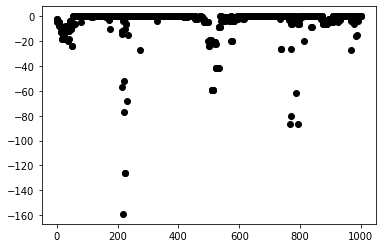

In [1221]:
plt.plot(np.nansum(H_array, axis=0), 'o', color='black');

In [1244]:
elements_count[-4.0]

34

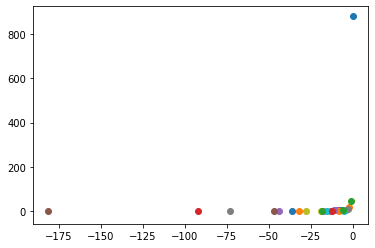

In [1828]:
for x in elements_count.keys():
   #x = data_dict.keys()
   y = elements_count[x]
   plt.scatter(x,y)

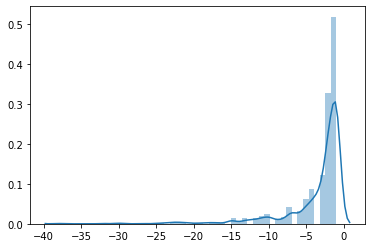

In [1210]:
sns.distplot(np.nansum(H_array, axis=1))

In [1251]:
mask = np.nonzero(np.nansum(H_array, axis = 0))[0]


In [1252]:
mask.shape

(309,)

In [1290]:
graph = H_array[:, mask]

In [1257]:
graph.shape

(1002, 309)

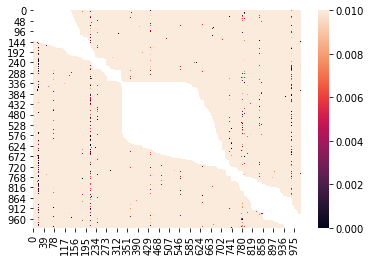

In [1816]:
sns.heatmap(H_array,vmin=0, vmax=0.01)
sns.diverging_palette(220, 20, as_cmap=True)

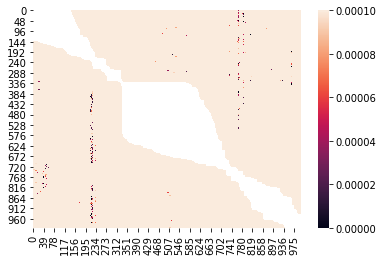

In [1779]:
sns.heatmap(H_array_rao,vmin=0, vmax=0.0001)

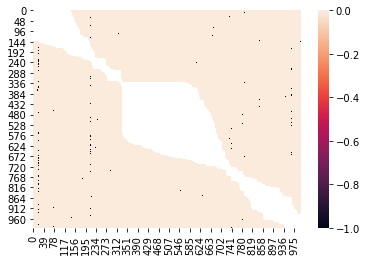

In [1160]:
sns.heatmap(H_array,vmin=-1, vmax=0)

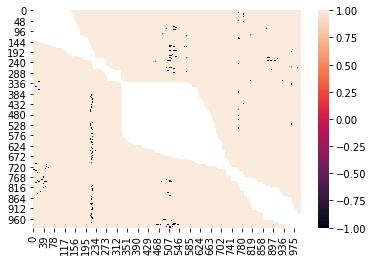

In [1130]:
sns.heatmap(H_array,vmin=-1, vmax=1)

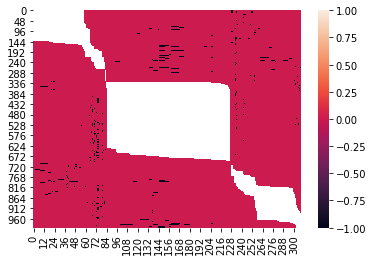

In [1264]:
sns.heatmap(graph,vmin=-1, vmax=1)

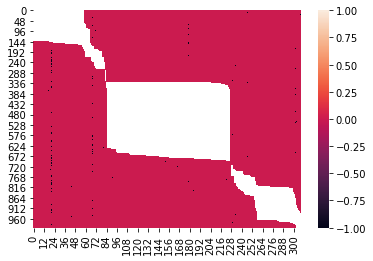

In [1297]:
sns.heatmap(graph,vmin=-1, vmax=1)

24.0


Text(0, 0.5, 'Genes in chromosome order')

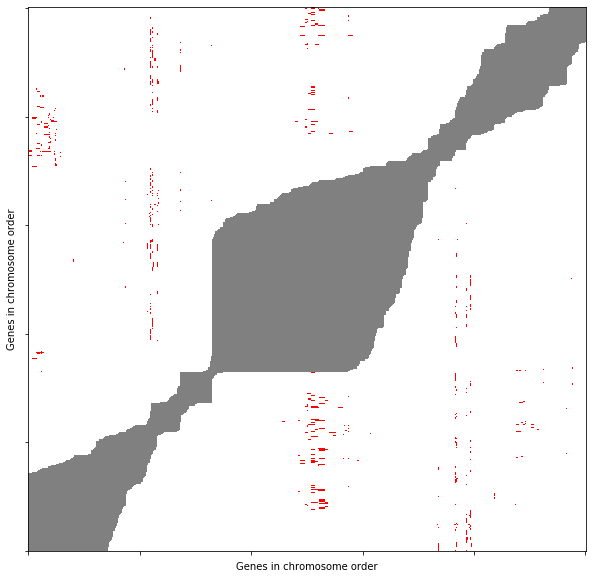

In [1126]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10)) 
#H = H_array
#print (H)
print ((H - H.T).max().max())
#H.mask(H < 0, inplace=True)
#elix.reset_index(drop=True, inplace=True)
#print (H.max())
vmax= 1
cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'white')])
#cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'white'), (vmax / vmax, 'blue')])
current_cmap = cmap
current_cmap.set_bad(color='grey')
#      vmax= 1000000
#      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
#      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))

imgp = ax.imshow(H_array,origin='low', aspect='auto' , vmin=-1, vmax=vmax, cmap=current_cmap)
#imgp = ax.imshow(H,origin='low', aspect='auto' , norm=LogNorm(), cmap=current_cmap)
#sns.heatmap(H, annot = False) 
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel("Genes in chromosome order")
ax.set_ylabel("Genes in chromosome order")
#cbar = ax.figure.colorbar(imgp, ax=ax)

In [1077]:
np.where(H_array[0] == 77)

(array([], dtype=int64),)

In [ ]:
np.where(t == i)

In [1019]:
np.nanmin(H_array)

1.0

In [978]:
df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_100.h5')

In [980]:
H = df_2_or.pivot_table(index='txStart_outer_x', columns='txStart_outer_y', values='exp')

In [982]:
H_array= H.to_numpy()

In [769]:
index_list = H.index.to_list()

In [770]:
index_list = [int(x/100000) for x in index_list]

In [771]:
t = np.array(index_list)

In [772]:
index_unique_list = np.unique(t)

for pairs in list(itertools.combinations(index_unique_list,2)):
    st_row = np.where(t == pairs[0])[0].min()
    end_row = np.where(t == pairs[0])[0].max() + 1
    
    st_col = np.where(t == pairs[1])[0].min()
    end_col = np.where(t == pairs[1])[0].max() +  1
    H_array[st_row:end_row,st_col:end_col] = np.median(H_array[st_row:end_row,st_col:end_col])

In [773]:
#for pairs in list(itertools.combinations(index_unique_list,2)):
for i in index_unique_list:
          for j in index_unique_list:
            st_row = np.where(t == i)[0].min()
            end_row = np.where(t == i)[0].max() + 1
            
            st_col = np.where(t == j)[0].min()
            end_col = np.where(t == j)[0].max() +  1
            H_array[st_row:end_row,st_col:end_col] = H_array[st_row:end_row,st_col:end_col].mean()

In [774]:
dataset = pd.DataFrame(data=H_array)

long_form = dataset.stack().reset_index()
long_form.columns = ['del_1', 'del_2','exp_median']  

df_2_or =  df_2_or.join(long_form[['exp_median']], how='left')    #merging on the index of the two dataframe

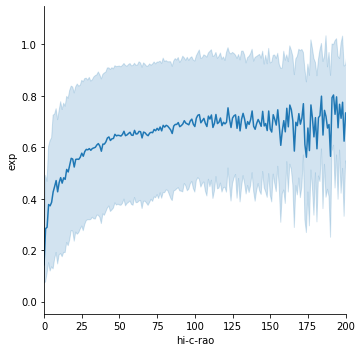

In [934]:
df_2_or = df_2_or[df_2_or['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
ax = sns.relplot(y="exp", x="hi-c-rao", kind="line", data=df_2_or, ci='sd');
ax.set(xlim=(0, 200))

In [781]:
H_array[H_array > 255] = 0

In [779]:
H_array[np.where(H_array>0.5)]

array([1.        , 0.75397578, 0.75397578, ..., 0.53415659, 0.51525079,
       1.        ])

[0. 0. 0. ... 0. 0. 0.]
0.0


TypeError: Invalid shape (741234,) for image data

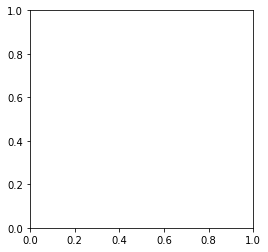

In [777]:
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4)) 
            H = H_array[np.where(H>0.5)]
            #print (H)
            print ((H - H.T))
            print ((H - H.T).max().max())
            #H.mask(H < 0, inplace=True)
            #elix.reset_index(drop=True, inplace=True)
            #print (H.max())
            vmax= 1.0
            cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'blue')])
            #cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'white'), (vmax / vmax, 'blue')])
            current_cmap = cmap
            #current_cmap.set_bad(color='grey')
            #      vmax= 1000000
            #      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
            #      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))
            
            imgp = ax.imshow(H,origin='low', aspect='auto' , vmin=0.0, vmax=vmax, cmap=current_cmap)
            #imgp = ax.imshow(H,origin='low', aspect='auto' , norm=LogNorm(), cmap=current_cmap)
            #sns.heatmap(H, annot = False) 
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_xlabel("Genes in chromosome order")
            ax.set_ylabel("Genes in chromosome order")
            #cbar = ax.figure.colorbar(imgp, ax=ax)

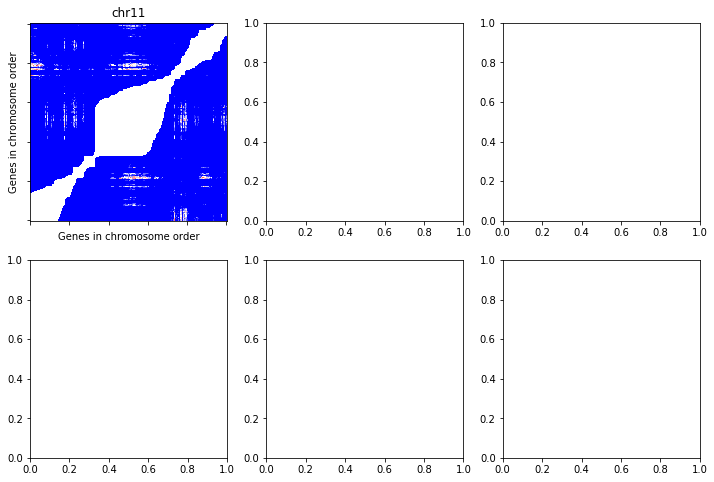

In [1007]:
plots_with_1_level_3d(df_2_or, 'hi-c-rao')

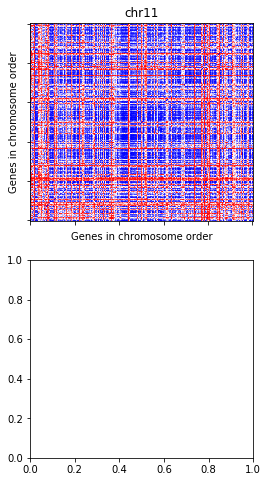

In [939]:
plots_with_1_level_3d(df_2_or, 'exp')

3.3306690738754696e-16


Text(0, 0.5, 'Genes in chromosome order')

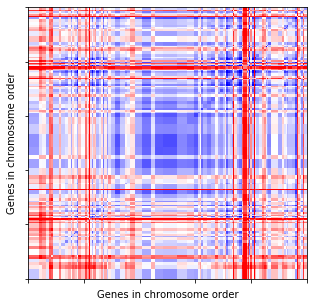

In [566]:
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5)) 
            #H = H_array
            #print (H)
            print ((H - H.T).max().max())
            #H.mask(H < 0, inplace=True)
            #elix.reset_index(drop=True, inplace=True)
            #print (H.max())
            vmax= 0.9
            cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'red'), (1./2, 'white'), (vmax / vmax, 'blue')])
            #cmap = LinearSegmentedColormap.from_list('mycmap', [(0/ vmax, 'white'), (vmax / vmax, 'blue')])
            current_cmap = cmap
            #current_cmap.set_bad(color='grey')
            #      vmax= 1000000
            #      current_cmap = LinearSegmentedColormap.from_list('mycmap', [ (0/ vmax, 'white'), (vmax / vmax, 'blue')])
            #      imgp = ax.imshow(H.T,origin='low', aspect='auto' , cmap=current_cmap, norm=LogNorm(vmin=1, vmax=vmax))
            
            imgp = ax.imshow(H,origin='low', aspect='auto' , vmin=0.3, vmax=vmax, cmap=current_cmap)
            #imgp = ax.imshow(H,origin='low', aspect='auto' , norm=LogNorm(), cmap=current_cmap)
            #sns.heatmap(H, annot = False) 
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.set_xlabel("Genes in chromosome order")
            ax.set_ylabel("Genes in chromosome order")
            #cbar = ax.figure.colorbar(imgp, ax=ax)

In [487]:
H_array.max()

1.0

In [ ]:
plots_with_1_level_3d(df_2_or_gene_TN_0_30, 'hi-c-rao')

In [455]:
H_n[np.where(t == 7)[0],:][:,np.where(t == 8)[0]] 

array([[0.90037713, 0.81138045, 0.89414419, 0.84966892, 0.4860038 ,
        0.96066464, 0.96372763, 0.8388559 , 0.38749483, 0.95798878,
        0.75761013, 0.90390877],
       [0.96826807, 0.79881626, 0.86236873, 0.75683795, 0.72572801,
        0.98979653, 0.98054401, 0.90803702, 0.67846936, 0.94700991,
        0.8425759 , 0.98283687],
       [0.94193857, 0.86514516, 0.9371255 , 0.60150642, 0.59861116,
        0.91937499, 0.87730787, 0.78998749, 0.540591  , 0.88139341,
        0.74111514, 0.90814383],
       [0.44210476, 0.34418315, 0.51446643, 0.09776223, 0.11318229,
        0.36142287, 0.35600971, 0.20184064, 0.38522616, 0.32445954,
        0.32427993, 0.39837183],
       [0.98730345, 0.91604063, 0.84974912, 0.68397211, 0.73917571,
        0.98491995, 0.97395241, 0.89808036, 0.55493815, 0.95760378,
        0.89061809, 0.94140269],
       [0.98387626, 0.85821903, 0.94393896, 0.7660699 , 0.59241588,
        0.96697921, 0.95894112, 0.74977283, 0.64471971, 0.93720077,
        0.78513713,

In [399]:
H_n[np.where(t == 9)[0].min():np.where(t == 11)[0].max()+1,np.where(t == 9)[0].min():np.where(t == 10)[0].max()+1].mean()

7.639593147034282

In [397]:
H_n[np.where(t == 9)[0].min():np.where(t == 11)[0].max(),np.where(t == 9)[0].min():np.where(t == 10)[0].max()]

array([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [373]:
H_n[np.where(t == 9)[0],:][:,np.where(t == 9)[0]]

array([[0.7       , 0.65265334, 0.52103938, 0.52750067, 0.41061738,
        0.22846064],
       [0.7       , 1.        , 0.65698243, 0.71263662, 0.45991516,
        0.369399  ],
       [0.52103938, 0.65698243, 1.        , 0.98698754, 0.84010889,
        0.69958787],
       [0.52750067, 0.71263662, 0.98698754, 1.        , 0.86005287,
        0.73497985],
       [0.41061738, 0.45991516, 0.84010889, 0.86005287, 1.        ,
        0.89803738],
       [0.22846064, 0.369399  , 0.69958787, 0.73497985, 0.89803738,
        1.        ]])

In [334]:
x = np.arange(30).reshape(3,10)

In [335]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [355]:
b = np.array([True, True, False])

In [351]:
c = np.array([False, True, True,False, True, True,False, True, True,True])

In [362]:
x[:,c][b,:]

array([[ 1,  2,  4,  5,  7,  8,  9],
       [11, 12, 14, 15, 17, 18, 19]])

In [270]:
H_n =  H.to_numpy()

In [280]:
st = 0
end = 3

In [385]:
H_n[st:end+1,st:end]

array([[0.7, 0.7, 0.7],
       [0.7, 0.7, 0.7],
       [0.8, 0.8, 0.8],
       [0.8, 0.8, 0.8]])

In [284]:
H_n

array([[0.7       , 0.7       , 0.7       , ..., 0.76375373, 0.93284579,
        0.86223119],
       [0.7       , 0.7       , 0.7       , ..., 0.93563969, 0.88664558,
        0.93368371],
       [0.7       , 0.7       , 0.7       , ..., 0.37858291, 0.45530073,
        0.33836886],
       ...,
       [0.76375373, 0.93563969, 0.37858291, ..., 1.        , 0.95814406,
        0.95738065],
       [0.93284579, 0.88664558, 0.45530073, ..., 0.95814406, 1.        ,
        0.965351  ],
       [0.86223119, 0.93368371, 0.33836886, ..., 0.95738065, 0.965351  ,
        1.        ]])

In [237]:
H[H.index<1000000]

txStart_outer_y  778626     825137     911434     923927     959309     \
txStart_outer_x                                                          
778626            1.000000   0.795363   0.542804   0.451949   0.833483   
825137            0.795363   1.000000   0.419972   0.456052   0.952361   
911434            0.542804   0.419972   1.000000   0.652653   0.521039   
923927            0.451949   0.456052   0.652653   1.000000   0.656982   
959309            0.833483   0.952361   0.521039   0.656982   1.000000   
960583            0.867955   0.895054   0.527501   0.712637   0.986988   
966481            0.583312   0.455271   0.410617   0.459915   0.840109   
982093            0.434424   0.445425   0.228461   0.369399   0.699588   

txStart_outer_y  960583     966481     982093     1000172    1001137    ...  \
txStart_outer_x                                                         ...   
778626            0.867955   0.583312   0.434424   0.403705   0.242381  ...   
825137            0.895054   0.455271   0.445425   0.530916   0.399459  ...   
911434            0.527501   0.410617   0.228461   0.253063   0.077471  ...   
923927            0.712637   0.459915   0.369399   0.514615   0.302695  ...   
959309            0.986988   0.840109   0.699588   0.816809   0.837351  ...   
960583            1.000000   0.860053   0.734980   0.829764   0.794470  ...   
966481            0.860053   1.000000   0.898037   0.820914   0.758308  ...   
982093            0.734980   0.898037   1.000000   0.788004   0.527765  ...   

txStart_outer_y  247458105  247507057  247857186  247895586  248030069  \
txStart_outer_x                                                          
778626            0.302802   0.408970   0.508224   0.294071   0.313602   
825137            0.219729   0.503699   0.661096   0.479318   0.395441   
911434            0.080981   0.088441   0.253435   0.283873   0.085861   
923927            0.073340   0.166112   0.220809   0.073019   0.034468   
959309            0.217908   0.365334   0.732293   0.581978   0.160844   
960583            0.205503   0.345161   0.476788   0.470601   0.210881   
966481            0.157921   0.098106   0.216357   0.081204   0.034149   
982093            0.056539   0.074405   0.140551   0.112722   0.005566   

txStart_outer_y  248095183  248825915  248838209  248859144  248906195  
txStart_outer_x                                                         
778626            0.160920   0.896949   0.763754   0.932846   0.862231  
825137            0.427875   0.891803   0.935640   0.886646   0.933684  
911434            0.082822   0.416658   0.378583   0.455301   0.338369  
923927            0.082952   0.525138   0.672329   0.669089   0.519295  
959309            0.239354   0.977070   0.998953   0.979892   0.960807  
960583            0.133548   0.959885   0.953686   0.995867   0.928330  
966481            0.003445   0.664612   0.824771   0.744605   0.512252  
982093            0.004332   0.565241   0.676115   0.600830   0.299363  

[8 rows x 1806 columns]

In [254]:
HT[H.index<1000000][[778626,825137,911434,923927]] = H[H.index<1000000][[778626,825137,911434,923927]].values.mean()

In [266]:
HT = .6

In [268]:
HT

0.6

In [267]:
HT[HT.index<1000000][[778626,825137,911434,923927]]

AttributeError: 'float' object has no attribute 'index'

In [256]:
H[H.index<1000000][[778626,825137,911434,923927]].values.mean()

0.624731987437572

In [230]:
H.median()

txStart_outer_y
778626       0.670685
825137       0.802272
911434       0.267165
923927       0.429924
959309       0.854155
               ...   
248095183    0.199434
248825915    0.838509
248838209    0.846229
248859144    0.803104
248906195    0.846990
Length: 1806, dtype: float64

In [12]:
df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0]

In [ ]:
import itertools
for i in list(itertools.permutations(range(0,100)))[0]:
    pass

In [6]:
list(range(0,5))

[0, 1, 2, 3, 4]

In [10]:
import random
prot_list = list(range(0,10))
random.shuffle(prot_list)

In [11]:
prot_list

[5, 0, 3, 9, 1, 7, 8, 4, 2, 6]

In [783]:
import pandas as pd
import warnings
from lohia_utilities.calculate_auc import *
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from lohia_utilities.create_corr_network import rank
import itertools
import random

def calc_auc_hic(resoulution_in_kb, case='simple', dist_tp='exp', prediction='hi-c-rao', shuffle=False):

    df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_%s.h5' %resoulution_in_kb)

    #df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization
    df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] # liming the matrix to only chosen values for rank standerization

    #ranked_matirx = rank(df_2_or['exp_georg'])
    #df_2_or['exp_georg'] = ranked_matirx
    #df_2_or.rename(columns={"exp_georg": "exp (GK)"}, inplace=True)

    ranked_matirx = rank(df_2_or['exp'])
    df_2_or['exp'] = ranked_matirx

    #ranked_matirx = rank(df_2_or['hi-c-rao'])
    #df_2_or['hi-c-rao'] = ranked_matirx
    m_l = []
    change_group_level_1 = df_2_or.groupby(['chrom_x'])
    for chrm in change_group_level_1.groups.keys():
        df = change_group_level_1.get_group(chrm)
        
        num_pairs = df['Gene stable ID_x'].nunique()

        prot_list_sp = np.array_split(df, num_pairs, axis=0)
        
        #list(itertools.permutations(range(0,num_pairs)))[0]
        prot_list = list(range(0,num_pairs))
        if shuffle ==True:
            random.shuffle(prot_list)
        else:
            pass
        for i, shuf_i in zip(list(range(0,num_pairs)), prot_list):
            

        #for i in range(0,1):

            long_form_top = prot_list_sp[int(i)]
            long_form_top_shuf = prot_list_sp[int(shuf_i)]
            long_form_top['dist'] = long_form_top[dist_tp]
            #long_form_top_shuf['dist'] = long_form_top_shuf[dist_tp]
            long_form_top['exp'] = long_form_top_shuf['exp'].to_list()

            long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization

            long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set
            
            mp =  long_form_top['Gene stable ID_y'].values[0]
            #print (long_form_top.shape)
            
            exp_median = long_form_top['exp'].median()
            exp_mean = long_form_top['exp'].mean()
            exp_var = long_form_top['exp'].var()

            long_form_top = long_form_top.reset_index()
            if exp_median >=0:
                for dist_thresh in [1,10]:
                #for dist_thresh in [0.5,0.8]:
                #for dist_thresh in [100000,1000000,10000000,100000000]:
                #for dist_thresh in [4000]:
                #for dist_thresh in [df_2_or_u["hi-c-rao"].min(), df_2_or["hi-c-rao"].max()-1, df_2_or["hi-c-rao"].mean(), df_2_or["hi-c-rao"].median()]:
                    if case == 'simple':
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]
                    elif case == 'tp':
                    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                        long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 1
                    else:    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 0
                    #
                    #long_form_top["True_sim"] = [1 if score <= dist_thresh else 0 for score in long_form_top["dist"]] 
                    #long_form_top["True_sim"] = [1 if score >= dist_thresh else 1 if score2 <= 1000 else 0 for score, score2 in zip(long_form_top["dist"],long_form_top["tss_tss"])]    
                    long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                    long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                    long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top[prediction]]
                    ca = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                    m_curve = calc_auc_curve (long_form_top,predicted_score='predicted_sim_from_exp')
                    pr_curve = prec_recall (long_form_top,predicted_score='predicted_sim_from_exp')

                    tpd = pd.DataFrame(m_curve)
                    if m_curve:
                        tpd[0] =  tpd[0].astype(float).round(2)
                        tpd = tpd.groupby([0]).mean()
                        m_curve  = dict(zip(tpd.index, tpd[1]))
                    else:
                        m_curve  = {}
                    tpd = pd.DataFrame(pr_curve)
                    if pr_curve:
                        tpd[0] =  tpd[0].astype(float).round(2)
                        tpd = tpd.groupby([0]).mean()
                        pr_curve  = dict(zip(tpd.index, tpd[1]))
                    else:
                        pr_curve  = {}
                    m_l.append((chrm, num_pairs,dist_thresh, ca, m_curve, pr_curve, long_form_top["true_pos"].sum(), long_form_top["true_neg"].sum(), exp_median, exp_mean, exp_var, mp))
            else:
                pass

    df_scores = pd.DataFrame(m_l, columns =['chrm', 'num_pairs','dist_thresh',  'auc', 'plot', 'pr_curve', 'true_pos', 'true_neg', 'exp_median', 'exp_mean', 'exp_var', 'Gene stable ID'])
    #df_scores.to_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s.h5' %(resoulution_in_kb, case, dist_tp), key='df', mode='w')    
    return df_scores

In [1435]:
import pandas as pd
import warnings
from lohia_utilities.calculate_auc import *
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from lohia_utilities.create_corr_network import rank
import itertools
import random

def calc_auc_hic(resoulution_in_kb, case='simple', dist_tp='exp', prediction='hi-c-rao', shuffle=False):

    df_2_or = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_dist_with_georg_hic_sub_median_hic_%s.h5' %resoulution_in_kb)

    #df_2_or = df_2_or[df_2_or['exp_georg'] >= 0] # liming the matrix to only chosen values for rank standerization
    df_2_or = df_2_or[df_2_or['hi-c-rao'] >= 0] # liming the matrix to only chosen values for rank standerization

    #ranked_matirx = rank(df_2_or['exp_georg'])
    #df_2_or['exp_georg'] = ranked_matirx
    #df_2_or.rename(columns={"exp_georg": "exp (GK)"}, inplace=True)

    ranked_matirx = rank(df_2_or['exp'])
    df_2_or['exp'] = ranked_matirx

    #ranked_matirx = rank(df_2_or['hi-c-rao'])
    #df_2_or['hi-c-rao'] = ranked_matirx
    m_l = []
    change_group_level_1 = df_2_or.groupby(['chrom_x'])
    for chrm in change_group_level_1.groups.keys():
        df = change_group_level_1.get_group(chrm)
        
        num_pairs = df['Gene stable ID_x'].nunique()

        prot_list_sp = np.array_split(df, num_pairs, axis=0)
        
        #list(itertools.permutations(range(0,num_pairs)))[0]
        prot_list = list(range(0,num_pairs))
        if shuffle ==True:
            random.shuffle(prot_list)
        else:
            pass
        #for i, shuf_i in zip(list(range(0,num_pairs)), prot_list):
        #for i in list(range(0,num_pairs)):
        for i in list(range(110,115)):
            
            long_form_top = prot_list_sp[int(i)]
            long_form_top['dist'] = long_form_top[dist_tp]
            long_form_top['i_range'] = list(range(0,long_form_top.shape[0] ))
            long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set
            long_form_top = long_form_top.reset_index()


            
            for dist_thresh in [1]:
                if case == 'simple':
                    long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]
                elif case == 'tp':
                    long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                    long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                    for ind_val in long_form_top.index.values[0:dist_thresh]:
                        long_form_top.at[ind_val, 'True_sim'] = 1
                else:    
                    long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                    long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                    for ind_val in long_form_top.index.values[0:dist_thresh]:
                        long_form_top.at[ind_val, 'True_sim'] = 0
                long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top[prediction]]
                c_original = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                
            #prot_list = list(range(0,num_pairs))
            #prot_list.remove(i)
            
            for shuf_i in long_form_top['i_range'].to_list():
            #for shuf_i in [100]:

                long_form_top = prot_list_sp[int(i)]
                long_form_top_shuf = prot_list_sp[int(shuf_i)]
                long_form_top['dist'] = long_form_top[dist_tp]
                #long_form_top_shuf['dist'] = long_form_top_shuf[dist_tp]
                long_form_top['dist_prediction'] = long_form_top_shuf[dist_tp].to_list()
                long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
                long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set
                
                mp =  long_form_top['Gene stable ID_y'].values[0]
                mp_precited = long_form_top_shuf['Gene stable ID_y'].values[0]

                exp_median = long_form_top['exp'].median()
                exp_mean = long_form_top['exp'].mean()
                exp_var = long_form_top['exp'].var()

                long_form_top = long_form_top.reset_index()
                
                for dist_thresh in [1]:
                    if case == 'simple':
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]
                    elif case == 'tp':
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                        long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 1
                    else:    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 0
                    long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                    long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                    long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top['dist_prediction']]
                    c_hic = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                    
                long_form_top = prot_list_sp[int(i)]
                long_form_top_shuf = prot_list_sp[int(shuf_i)]
                long_form_top['dist'] = long_form_top[dist_tp]
                #long_form_top_shuf['dist'] = long_form_top_shuf[dist_tp]
                long_form_top['exp'] = long_form_top_shuf['exp'].to_list()
                long_form_top = long_form_top[long_form_top['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
                long_form_top = long_form_top[long_form_top['Gene stable ID_x'] != long_form_top['Gene stable ID_y']] # remove all the self pairs from each set
                
                mp =  long_form_top['Gene stable ID_y'].values[0]
                mp_precited = long_form_top_shuf['Gene stable ID_y'].values[0]

                exp_median = long_form_top['exp'].median()
                exp_mean = long_form_top['exp'].mean()
                exp_var = long_form_top['exp'].var()

                long_form_top = long_form_top.reset_index()
            

                for dist_thresh in [1]:
                    if case == 'simple':
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 0 for score in long_form_top["dist"]]
                    elif case == 'tp':
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=False) 
                        long_form_top["True_sim"] = [0 if score > dist_thresh else 0 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 1
                    else:    
                        long_form_top = long_form_top.sort_values(by=['dist'], ascending=True) 
                        long_form_top["True_sim"] = [1 if score > dist_thresh else 1 for score in long_form_top["dist"]]  
                        for ind_val in long_form_top.index.values[0:dist_thresh]:
                            long_form_top.at[ind_val, 'True_sim'] = 0
                    long_form_top["true_pos"] = [score for score in long_form_top["True_sim"]]
                    long_form_top["true_neg"] = [1 if score==0 else 0 for score in long_form_top["True_sim"]]
                    long_form_top["predicted_sim_from_exp"] = [score for score in long_form_top[prediction]]
                    ca = calc_auroc (long_form_top,predicted_score='predicted_sim_from_exp')
                    m_curve  = {}
                    pr_curve  = {}
                    m_l.append((chrm, num_pairs,dist_thresh, ca, m_curve, pr_curve, long_form_top["true_pos"].sum(), long_form_top["true_neg"].sum(), exp_median, exp_mean, exp_var, mp, mp_precited, c_original, c_hic))


    df_scores = pd.DataFrame(m_l, columns =['chrm', 'num_pairs','dist_thresh',  'auc', 'plot', 'pr_curve', 'true_pos', 'true_neg', 'exp_median', 'exp_mean', 'exp_var', 'Gene stable ID', 'mp_precited', 'auc_or', 'auc_hic'])
    #df_scores.to_hdf('/data/lohia/gene_distance_expresseion/dist_files/combined_%s_%s_%s.h5' %(resoulution_in_kb, case, dist_tp), key='df', mode='w')    
    return df_scores

In [1801]:
for resoultion in [100]:
        for case in ['tn']:
            #df_scores = calc_auc_hic(resoultion, case=case, dist_tp='hi-c-rao', prediction='exp', shuffle=False)
            df_scores =pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/11_100_tn_hi-c-rao_exp_permutations_includes_adjacent_hic.h5')
            

In [1803]:
df_scores = df_scores.rename(columns={"dist_thresh": "TN"})

In [1804]:
df_scores = df_scores.rename(columns={"auc": "auc_permutations"})

In [1805]:
df_scores = df_scores.rename(columns={"auc_or": "auc"})

In [1806]:
df_scores['auc_permutations_median'] = df_scores.groupby(['Gene stable ID'])['auc_permutations'].transform('median')  

In [1704]:
y = df_scores.drop_duplicates(subset=['Gene stable ID'])['auc_permutations_median'] - df_scores.drop_duplicates(subset=['Gene stable ID'])['auc_or'].median()

In [1712]:
sum([1 if x >=0 else 0 for x in y.to_list() ])

417

In [ ]:
df_scores.drop_duplicates(subset=['Gene stable ID'])['p_val']

In [1793]:
df_scores["auc_hic"].median()

0.8621755253399215

In [ ]:
df_scores.drop_duplicates(subset=['Gene stable ID'])[

In [1802]:
df_scores = df_scores[df_scores['auc_hic'] <0.6]


In [1601]:
df_scores = df_scores[df_scores['auc_or'] >0.6]

In [1619]:
df_scores = df_scores[df_scores['samples'] <280]

In [1620]:
df_scores

chrm  num_pairs  dist_thresh       auc plot pr_curve  true_pos  \
62186   chr11       1004            1  0.901408   {}       {}       710   
62190   chr11       1004            1  0.901408   {}       {}       710   
62191   chr11       1004            1  0.901408   {}       {}       710   
62193   chr11       1004            1  0.901408   {}       {}       710   
62194   chr11       1004            1  0.901408   {}       {}       710   
...       ...        ...          ...       ...  ...      ...       ...   
999978  chr11       1004            1  0.901408   {}       {}       710   
999979  chr11       1004            1  0.901408   {}       {}       710   
999982  chr11       1004            1  0.901408   {}       {}       710   
999985  chr11       1004            1  0.940845   {}       {}       710   
999990  chr11       1004            1  0.901408   {}       {}       710   

        true_neg  exp_median  exp_mean   exp_var   Gene stable ID  \
62186          1    0.589374  0.545647  0.052450  ENSG00000187049   
62190          1    0.589374  0.545647  0.052450  ENSG00000187049   
62191          1    0.589374  0.545647  0.052450  ENSG00000187049   
62193          1    0.589374  0.545647  0.052450  ENSG00000187049   
62194          1    0.589374  0.545647  0.052450  ENSG00000187049   
...          ...         ...       ...       ...              ...   
999978         1    0.589374  0.545647  0.052450  ENSG00000162144   
999979         1    0.589374  0.545647  0.052450  ENSG00000162144   
999982         1    0.589374  0.545647  0.052450  ENSG00000162144   
999985         1    0.633611  0.578590  0.074277  ENSG00000162144   
999990         1    0.589374  0.545647  0.052450  ENSG00000162144   

            mp_precited    auc_or   auc_hic     p_val  samples  
62186   ENSG00000149311  0.992958  0.547183  0.029412      272  
62190   ENSG00000150433  0.992958  0.432394  0.029412      272  
62191   ENSG00000149289  0.992958  0.383099  0.029412      272  
62193   ENSG00000149557  0.992958  0.681690  0.029412      272  
62194   ENSG00000166086  0.992958  0.526056  0.029412      272  
...                 ...       ...       ...       ...      ...  
999978  ENSG00000196371  0.964789  0.043662  0.000000      272  
999979  ENSG00000137710  0.964789  0.427465  0.000000      272  
999982  ENSG00000214376  0.964789  0.036620  0.000000      272  
999985  ENSG00000110218  0.964789  0.039437  0.000000      272  
999990  ENSG00000064199  0.964789  0.404225  0.000000      272  

[12115 rows x 17 columns]

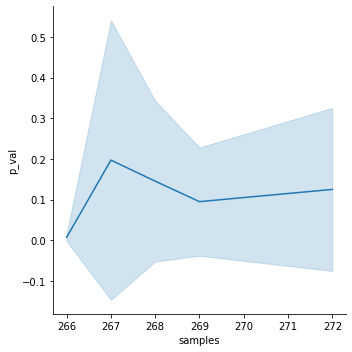

In [1621]:
ax = sns.relplot(y="p_val", x="samples", kind="line", data=df_scores, ci='sd');
#ax.set(xlim=(0.6, 1.0))

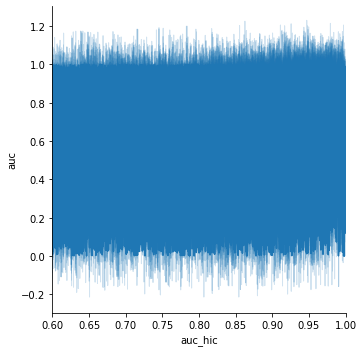

In [1467]:
ax = sns.relplot(y="auc", x="auc_hic", kind="line", data=df_scores, ci='sd');
ax.set(xlim=(0.6, 1.0))

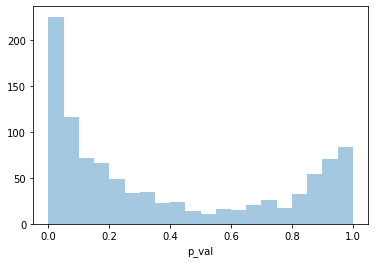

In [1690]:
import seaborn as sns
sns.distplot(df_scores.drop_duplicates(subset=['Gene stable ID'])['p_val'], bins=20,kde=False)
#ax = sns.distplot(df_2_or, bins=101, hist=True, kde=False, hist_kws={"range":(0, 100)})
#ax.set_xlim(0, 20)

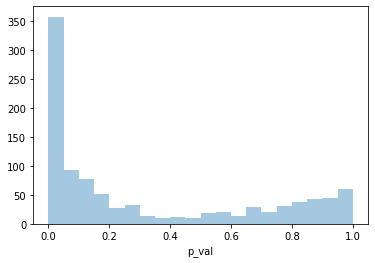

In [1697]:
import seaborn as sns
sns.distplot(df_scores.drop_duplicates(subset=['Gene stable ID'])['p_val'], bins=20,kde=False)
#ax = sns.distplot(df_2_or, bins=101, hist=True, kde=False, hist_kws={"range":(0, 100)})
#ax.set_xlim(0, 20)

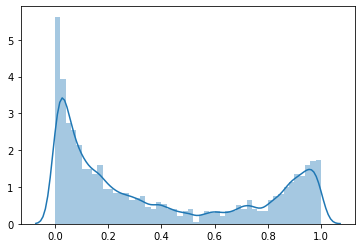

In [1672]:
import seaborn as sns
sns.distplot(df_scores[["p_val"]])

In [1608]:
df_scores

chrm  num_pairs  dist_thresh       auc plot pr_curve  true_pos  \
12       chr11       1004            1  0.758698   {}       {}       891   
13       chr11       1004            1  0.753086   {}       {}       891   
16       chr11       1004            1  0.739618   {}       {}       891   
21       chr11       1004            1  0.955107   {}       {}       891   
25       chr11       1004            1  0.976431   {}       {}       891   
...        ...        ...          ...       ...  ...      ...       ...   
1006993  chr11       1004            1  0.828671   {}       {}       858   
1006996  chr11       1004            1  0.828671   {}       {}       858   
1007003  chr11       1004            1  0.828671   {}       {}       858   
1007007  chr11       1004            1  0.828671   {}       {}       858   
1007008  chr11       1004            1  0.828671   {}       {}       858   

         true_neg  exp_median  exp_mean   exp_var   Gene stable ID  \
12              1    0.121187  0.128362  0.007605  ENSG00000149311   
13              1    0.181077  0.197166  0.014144  ENSG00000149311   
16              1    0.575126  0.521568  0.044223  ENSG00000149311   
21              1    0.709154  0.637962  0.078983  ENSG00000149311   
25              1    0.623800  0.579748  0.052413  ENSG00000149311   
...           ...         ...       ...       ...              ...   
1006993         1    0.590600  0.544989  0.049380  ENSG00000064199   
1006996         1    0.590600  0.544989  0.049380  ENSG00000064199   
1007003         1    0.590600  0.544989  0.049380  ENSG00000064199   
1007007         1    0.590600  0.544989  0.049380  ENSG00000064199   
1007008         1    0.590600  0.544989  0.049380  ENSG00000064199   

             mp_precited    auc_or   auc_hic     p_val  samples  
12       ENSG00000244734  0.933782  0.203143  0.425076      327  
13       ENSG00000188124  0.933782  0.258137  0.425076      327  
16       ENSG00000149294  0.933782  0.459035  0.425076      327  
21       ENSG00000149089  0.933782  0.158249  0.425076      327  
25       ENSG00000179532  0.933782  0.355780  0.425076      327  
...                  ...       ...       ...       ...      ...  
1006993  ENSG00000171202  0.828671  0.444639  1.000000      356  
1006996  ENSG00000183801  0.828671  0.414918  1.000000      356  
1007003  ENSG00000214376  0.828671  0.635781  1.000000      356  
1007007  ENSG00000110218  0.828671  0.329837  1.000000      356  
1007008  ENSG00000196778  0.828671  0.314685  1.000000      356  

[297125 rows x 17 columns]

In [1550]:
pd.melt(df_scores, id_vars=['chrm'], value_vars=['auc', 'auc_or'])

chrm variable     value
0       chr11      auc  0.758698
1       chr11      auc  0.753086
2       chr11      auc  0.739618
3       chr11      auc  0.955107
4       chr11      auc  0.976431
...       ...      ...       ...
536191  chr11   auc_or  0.828671
536192  chr11   auc_or  0.828671
536193  chr11   auc_or  0.828671
536194  chr11   auc_or  0.828671
536195  chr11   auc_or  0.828671

[536196 rows x 3 columns]

In [1633]:
df_scores['auc_or'].median()

0.8488950480581252

In [1692]:
df_scores['p_val'] = df_scores['auc'] - df_scores['auc_or']

In [1693]:
df_scores['p_val'] = [1 if x>=0 else 0 for x in df_scores['p_val']]

In [1694]:
df_scores['p_val'] = df_scores.groupby(['Gene stable ID'])['p_val'].transform('mean')  

In [1695]:
df_scores['samples'] = df_scores.groupby(['Gene stable ID'])['p_val'].transform('count')  

In [1696]:
#df_scores['p_val'] = (df_scores['p_val'] * 1.0) / (df_scores['true_pos'] + 1)

In [1713]:
df_scores[df_scores['p_val']<=.05]['Gene stable ID'].nunique()

KeyError: 'p_val'

In [1625]:
df_scores['Gene stable ID'].nunique()

45

In [892]:
df_scores[(df_scores['Gene stable ID']!='ENSG00000180878') & (df_scores['auc']>=0.864)].shape

(501, 14)

100 tn


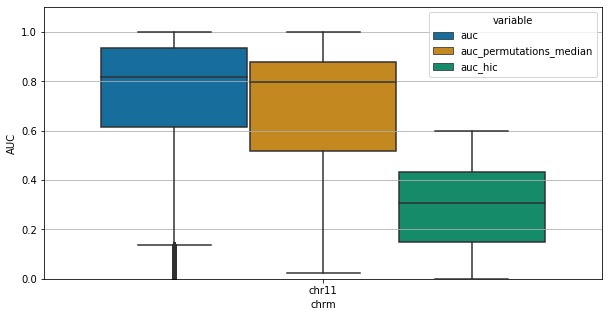

In [1807]:
#original
for resoultion in [100]:
    for case in ['tn']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(10,5))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='value', x='chrm', 
                         data=pd.melt(df_scores, id_vars=['chrm'], value_vars=['auc', 'auc_permutations_median', 'auc_hic']), 
                         palette="colorblind"
                         ,hue='variable'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

100 tn


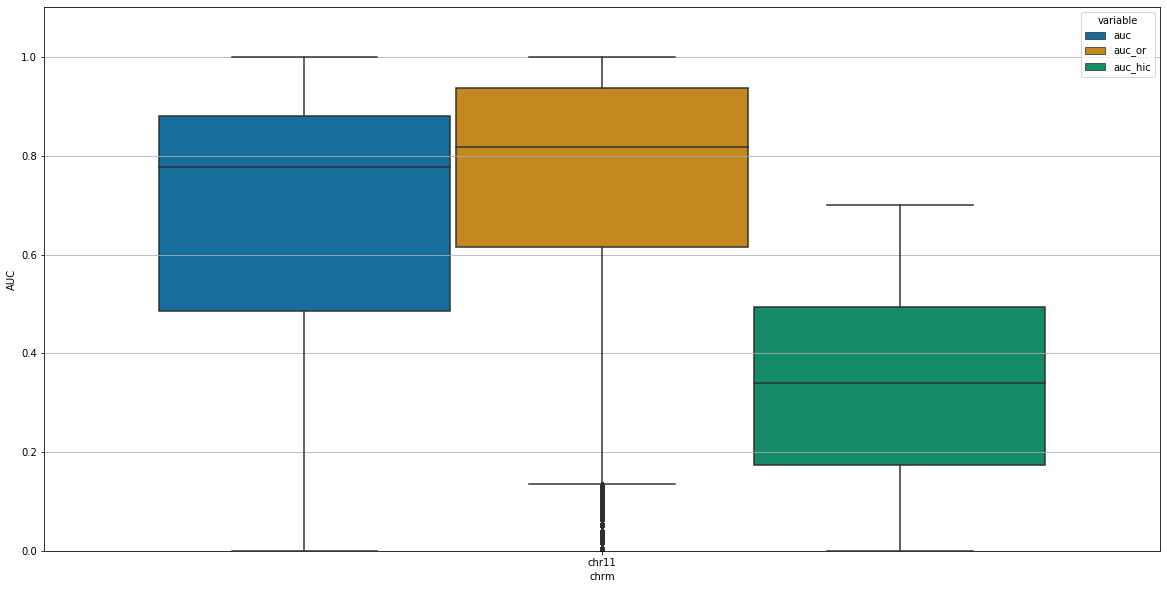

In [1565]:
#original
for resoultion in [100]:
    for case in ['tn']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='value', x='chrm', 
                         data=pd.melt(df_scores, id_vars=['chrm'], value_vars=['auc', 'auc_or', 'auc_hic']), 
                         palette="colorblind"
                         ,hue='variable'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

100 tn


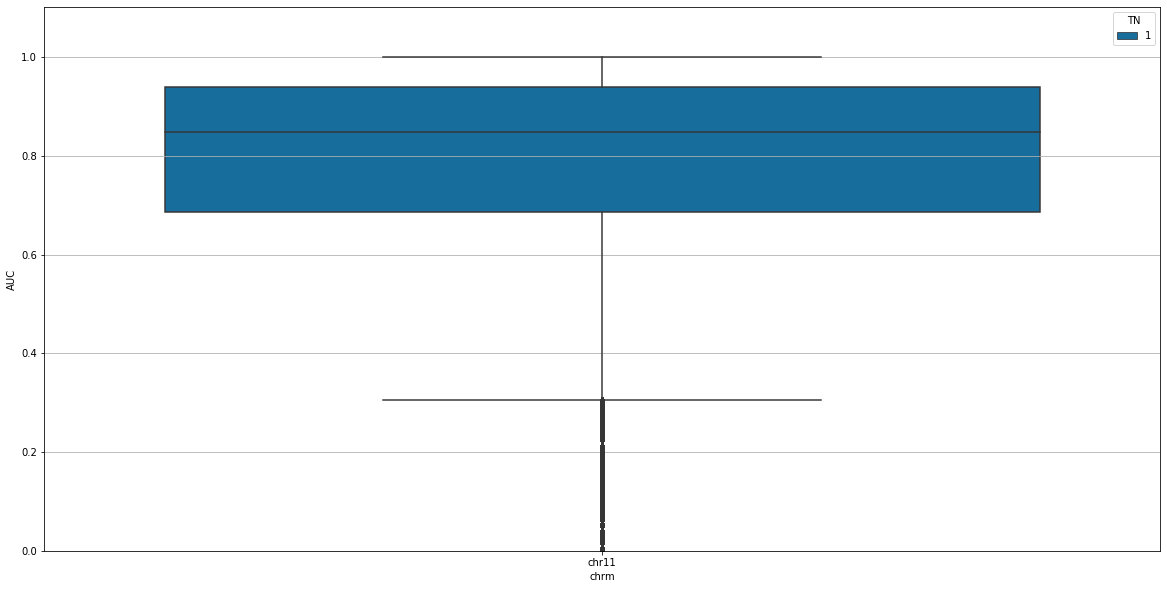

In [1631]:
#original
for resoultion in [100]:
    for case in ['tn']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc_or', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='TN'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

100 simple


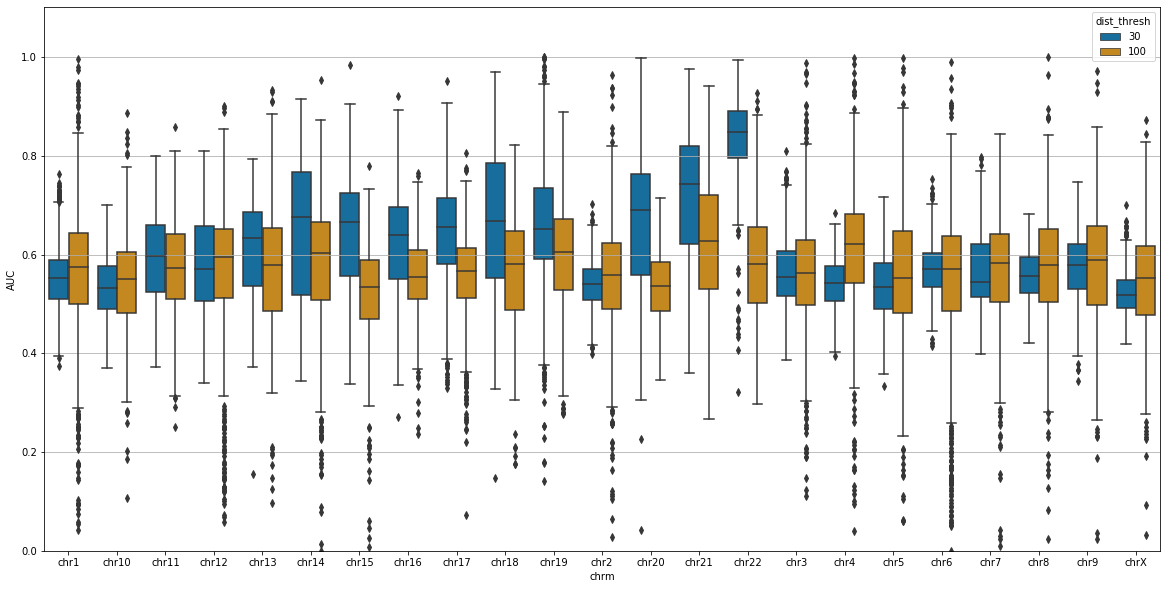

In [221]:
#original
for resoultion in [100]:
    for case in ['simple']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

In [786]:
for resoultion in [100]:
        for case in ['simple']:
            df_scores = calc_auc_hic(resoultion, case=case, dist_tp='hi-c-rao', prediction='exp', shuffle=True)

100 simple


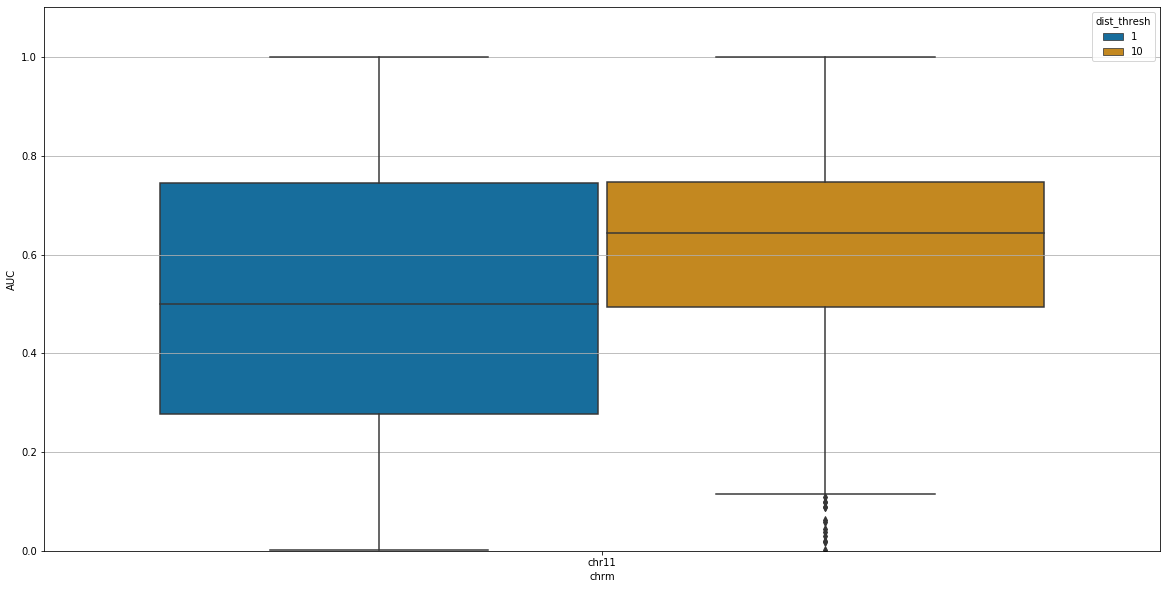

In [787]:
#original
for resoultion in [100]:
    for case in ['simple']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression') 
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

100 simple


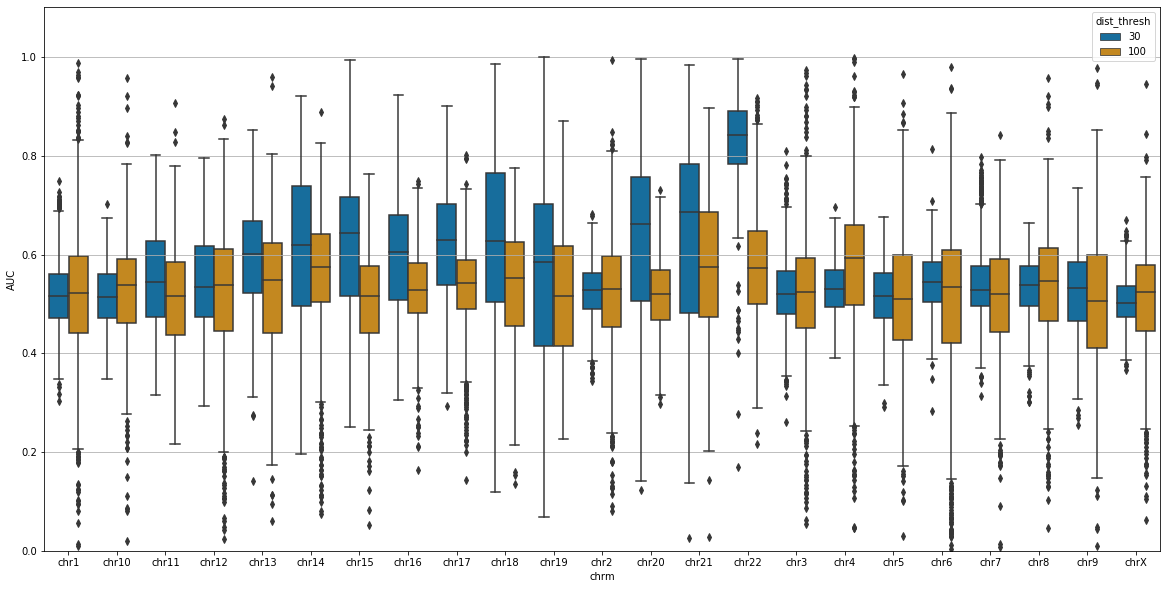

In [219]:
#original
for resoultion in [100]:
    for case in ['simple']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(20,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.boxplot(y='auc', x='chrm', 
                         data=df_scores, 
                         palette="colorblind"
                         ,hue='dist_thresh'
                   )
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression') 
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.set_ylim([0.0,1.101])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

In [7]:
predicted_score = [8,9,9,8,8,6,5,5,3,2]
true_case = [0,1,1,1,1,1,0,0,0,0]
true_pos = [0,1,1,1,1,1,0,0,0,0]
true_neg = [1 if score==0 else 0 for score in true_pos]
df_trial = pd.DataFrame(list(zip(predicted_score, true_pos, true_neg)), columns =['predicted_score', 'true_pos', 'true_neg']) 


In [8]:
from lohia_utilities.calculate_auc import *
calc_auroc (df_trial,predicted_score='predicted_score')

0.9199999999999999

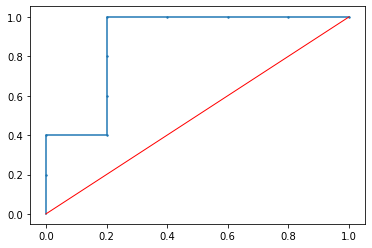

In [9]:
df_trial = df_trial.sort_values(by=['predicted_score'], ascending=False)
df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
df_trial['true_pos_cum'] = df_trial['true_pos'].cumsum()
df_trial['true_neg_cum'] = df_trial['true_neg'].cumsum()

fig, axes = plt.subplots()
axes.scatter([0] + df_trial['true_neg_cum'].values, [0] + df_trial['true_pos_cum'].values, s=2)
axes.plot([0] + df_trial['true_neg_cum'].tolist(), [0] + df_trial['true_pos_cum'].tolist())
#axes.set_ylim([0,1])
#axes.set_xlim([0,1])
axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()